# Imports

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os.path
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import glob
from rembg import remove 
from PIL import Image
import matplotlib.gridspec as gridspec
import duckdb as db

# Intro
Have you ever wondered how someone made a graph that used pictures or logos instead of just plain boring dots? Well, I did, you see for those who do not know me I love college basketball, to those who do know me it is pretty obvious. Every year when college basketball season rolls around I see some kind of chart that depicts college basketball statistics with the team's logos on the scatter plot. I always found those graphs interesting, since it is easy to pinpoint my favorite team and see how they compare to other teams. This year, curiosity got the best of me and I started researching how these graphs could be made. Lo and behold, I was extremely excited when I came across a [tutorial](https://fcpython.com/visualisation/creating-scatter-plots-with-club-logos-in-pytho) tutorial on how to make a scatterplot using English Premier League soccer teams using Matplotlib and Python. As a data analyst, I use Python a lot.

## Pull In Data

In [6]:
df = pd.read_csv('CBB_2022_2023_season.csv')
df2 = pd.read_csv('school_stats2022_2023.csv')
df

School   G   W   L   W-L%    SRS   SOS  Conf_W  Conf_L  \
0    Abilene Christian  30  13  17  0.433  -2.79  0.90     5.0    11.0   
1            Air Force  32  14  18  0.438   2.00  2.12     5.0    13.0   
2                Akron  33  22  11  0.667   4.19 -1.65    13.0     5.0   
3         Alabama NCAA  37  31   6  0.838  23.19  9.65    16.0     2.0   
4          Alabama A&M  33  15  18  0.455 -10.78 -7.71    10.0     8.0   
..                 ...  ..  ..  ..    ...    ...   ...     ...     ...   
358       Wright State  33  18  15  0.545  -2.34 -5.89    10.0    10.0   
359            Wyoming  31   9  22  0.290   2.02  6.12     4.0    14.0   
360        Xavier NCAA  37  27  10  0.730  16.03  9.16    15.0     5.0   
361               Yale  30  21   9  0.700   7.81 -1.62    10.0     4.0   
362   Youngstown State  34  24  10  0.706   1.67 -5.83    15.0     5.0   

     Home_W  ...   3PAr    TS%  TRB%  AST%  STL%  BLK%   eFG%  TOV%  ORB%  \
0         9  ...  0.341  0.543  49.1  58.0  12.3   7.0  0.510  15.5  28.6   
1        10  ...  0.448  0.570  47.7  64.9   8.9  11.0  0.542  17.2  22.3   
2        15  ...  0.445  0.559  52.1  52.5   8.9   7.2  0.524  14.4  29.9   
3        15  ...  0.472  0.557  54.4  54.3   8.2  11.3  0.521  15.9  34.2   
4         9  ...  0.327  0.528  47.8  50.9  11.4  12.0  0.501  18.6  30.0   
..      ...  ...    ...    ...   ...   ...   ...   ...    ...   ...   ...   
358       9  ...  0.276  0.569  51.6  48.0   8.5   7.8  0.546  15.3  27.3   
359       7  ...  0.457  0.551  49.3  46.6   7.3   7.5  0.520  16.0  24.1   
360      15  ...  0.312  0.578  53.9  63.6   8.8   7.9  0.552  15.0  30.7   
361      10  ...  0.351  0.564  54.2  52.2   9.3  12.6  0.540  14.3  29.7   
362      14  ...  0.356  0.585  51.7  51.2   9.9   6.9  0.552  13.6  31.0   

     FT/FGA  
0     0.230  
1     0.226  
2     0.250  
3     0.266  
4     0.228  
..      ...  
358   0.178  
359   0.236  
360   0.223  
361   0.208  
362   0.230  

[363 rows x 28 columns]

In [7]:
df2

Rk                    School      Conf   W   L   Pts   Opp    MOV   SOS  \
0      1                   Alabama       SEC  31   6  81.8  68.3  13.54  9.65   
1      2               Connecticut  Big East  31   8  78.6  64.1  14.44  8.51   
2      3                   Houston       AAC  33   4  74.9  57.5  17.41  4.79   
3      4                      UCLA    Pac-12  31   6  74.1  60.7  13.46  8.66   
4      5                 Tennessee       SEC  25  11  70.8  57.9  12.86  7.98   
..   ...                       ...       ...  ..  ..   ...   ...    ...   ...   
358  359  Mississippi Valley State      SWAC   5  27  61.0  74.8 -13.72 -4.56   
359  360                     IUPUI   Horizon   5  27  65.3  76.8 -11.47 -5.57   
360  361                 Green Bay   Horizon   3  29  59.3  76.5 -17.16 -3.14   
361  362                  Hartford       Ind   5  23  62.8  71.1  -8.36 -7.96   
362  363    Long Island University       NEC   3  26  66.7  80.0 -13.24 -6.61   

      OSRS   DSRS    SRS    ORtg    DRtg   NRtg  
0    16.81   6.38  23.19  116.59   84.21  32.38  
1    11.40  11.55  22.95  120.24   87.74  32.50  
2     5.59  16.60  22.20  118.29   84.87  33.42  
3     7.51  14.61  22.11  116.30   84.44  31.86  
4     4.15  16.69  20.84  113.02   82.38  30.64  
..     ...    ...    ...     ...     ...    ...  
358 -11.40  -6.88 -18.28   87.04  113.04 -26.00  
359  -8.88 -10.12 -19.00   91.01  118.47 -27.46  
360 -13.92  -6.38 -20.30   86.19  116.34 -30.15  
361 -14.68  -8.44 -23.12   84.31  118.29 -33.98  
362  -9.20 -15.27 -24.46   83.42  116.48 -33.06  

[363 rows x 15 columns]

## Data Clean Up
- Create Needed fields
- Combine Dataframes

To start we do need some data, those of you who look at sports data a lot may be familiar with [Sports Reference](https://www.sports-reference.com/) Sports Reference a website meant to democratize sports data. I used two important college basketball metrics to showcase this method of analysis, namely the Offensive and Defense Ratings from the 2022-2023 Regular Season. Those stats can be found [here](https://www.sports-reference.com/cbb/seasons/men/2023-ratings.html) on Sports Reference. Sports Reference defines the two metrics as:
- [Offensive Rating](https://www.sports-reference.com/cbb/about/glossary.html#off_rtg) Offensive Rating (ORtg): for schools, it is points scored per 100 possessions. The formula for schools is 100 * (PTS / Poss).
- [Defensive Rating](https://www.sports-reference.com/cbb/about/glossary.html#def_rtg) Defensive Rating (DRtg): points allowed per 100 possessions. The formula for schools is 100 * (Opp PTS / Poss).

In [8]:
df['Tournament'] = df['School'].map(lambda x: 'Made NCAA Tournament' if 'NCAA' in x else 'Missed NCAA Tournament')
df['School_new'] = df['School'].str.replace('[^a-zA-Z0-9 -]', '', regex=True).str.replace(' ','-')\
.str.replace('NCAA', '').str.strip().str.lower().str.replace('--','-')
df

School   G   W   L   W-L%    SRS   SOS  Conf_W  Conf_L  \
0    Abilene Christian  30  13  17  0.433  -2.79  0.90     5.0    11.0   
1            Air Force  32  14  18  0.438   2.00  2.12     5.0    13.0   
2                Akron  33  22  11  0.667   4.19 -1.65    13.0     5.0   
3         Alabama NCAA  37  31   6  0.838  23.19  9.65    16.0     2.0   
4          Alabama A&M  33  15  18  0.455 -10.78 -7.71    10.0     8.0   
..                 ...  ..  ..  ..    ...    ...   ...     ...     ...   
358       Wright State  33  18  15  0.545  -2.34 -5.89    10.0    10.0   
359            Wyoming  31   9  22  0.290   2.02  6.12     4.0    14.0   
360        Xavier NCAA  37  27  10  0.730  16.03  9.16    15.0     5.0   
361               Yale  30  21   9  0.700   7.81 -1.62    10.0     4.0   
362   Youngstown State  34  24  10  0.706   1.67 -5.83    15.0     5.0   

     Home_W  ...  TRB%  AST%  STL%  BLK%   eFG%  TOV%  ORB%  FT/FGA  \
0         9  ...  49.1  58.0  12.3   7.0  0.510  15.5  28.6   0.230   
1        10  ...  47.7  64.9   8.9  11.0  0.542  17.2  22.3   0.226   
2        15  ...  52.1  52.5   8.9   7.2  0.524  14.4  29.9   0.250   
3        15  ...  54.4  54.3   8.2  11.3  0.521  15.9  34.2   0.266   
4         9  ...  47.8  50.9  11.4  12.0  0.501  18.6  30.0   0.228   
..      ...  ...   ...   ...   ...   ...    ...   ...   ...     ...   
358       9  ...  51.6  48.0   8.5   7.8  0.546  15.3  27.3   0.178   
359       7  ...  49.3  46.6   7.3   7.5  0.520  16.0  24.1   0.236   
360      15  ...  53.9  63.6   8.8   7.9  0.552  15.0  30.7   0.223   
361      10  ...  54.2  52.2   9.3  12.6  0.540  14.3  29.7   0.208   
362      14  ...  51.7  51.2   9.9   6.9  0.552  13.6  31.0   0.230   

                 Tournament         School_new  
0    Missed NCAA Tournament  abilene-christian  
1    Missed NCAA Tournament          air-force  
2    Missed NCAA Tournament              akron  
3      Made NCAA Tournament            alabama  
4    Missed NCAA Tournament         alabama-am  
..                      ...                ...  
358  Missed NCAA Tournament       wright-state  
359  Missed NCAA Tournament            wyoming  
360    Made NCAA Tournament             xavier  
361  Missed NCAA Tournament               yale  
362  Missed NCAA Tournament   youngstown-state  

[363 rows x 30 columns]

In [9]:
df2['School_new'] = df2['School'].str.replace('[^a-zA-Z0-9 -]', '', regex=True).str.replace(' ','-')\
.str.replace('NCAA', '').str.strip().str.lower().str.replace('--','-')
df2

Rk                    School      Conf   W   L   Pts   Opp    MOV   SOS  \
0      1                   Alabama       SEC  31   6  81.8  68.3  13.54  9.65   
1      2               Connecticut  Big East  31   8  78.6  64.1  14.44  8.51   
2      3                   Houston       AAC  33   4  74.9  57.5  17.41  4.79   
3      4                      UCLA    Pac-12  31   6  74.1  60.7  13.46  8.66   
4      5                 Tennessee       SEC  25  11  70.8  57.9  12.86  7.98   
..   ...                       ...       ...  ..  ..   ...   ...    ...   ...   
358  359  Mississippi Valley State      SWAC   5  27  61.0  74.8 -13.72 -4.56   
359  360                     IUPUI   Horizon   5  27  65.3  76.8 -11.47 -5.57   
360  361                 Green Bay   Horizon   3  29  59.3  76.5 -17.16 -3.14   
361  362                  Hartford       Ind   5  23  62.8  71.1  -8.36 -7.96   
362  363    Long Island University       NEC   3  26  66.7  80.0 -13.24 -6.61   

      OSRS   DSRS    SRS    ORtg    DRtg   NRtg                School_new  
0    16.81   6.38  23.19  116.59   84.21  32.38                   alabama  
1    11.40  11.55  22.95  120.24   87.74  32.50               connecticut  
2     5.59  16.60  22.20  118.29   84.87  33.42                   houston  
3     7.51  14.61  22.11  116.30   84.44  31.86                      ucla  
4     4.15  16.69  20.84  113.02   82.38  30.64                 tennessee  
..     ...    ...    ...     ...     ...    ...                       ...  
358 -11.40  -6.88 -18.28   87.04  113.04 -26.00  mississippi-valley-state  
359  -8.88 -10.12 -19.00   91.01  118.47 -27.46                     iupui  
360 -13.92  -6.38 -20.30   86.19  116.34 -30.15                 green-bay  
361 -14.68  -8.44 -23.12   84.31  118.29 -33.98                  hartford  
362  -9.20 -15.27 -24.46   83.42  116.48 -33.06    long-island-university  

[363 rows x 16 columns]

In [18]:
df_ncaa = db.query('''
select * from df full outer join df2 on df.School_new = df2.School_new
''').to_df()
df_ncaa

School   G   W   L   W-L%    SRS   SOS  Conf_W  Conf_L  \
0    Abilene Christian  30  13  17  0.433  -2.79  0.90     5.0    11.0   
1            Air Force  32  14  18  0.438   2.00  2.12     5.0    13.0   
2                Akron  33  22  11  0.667   4.19 -1.65    13.0     5.0   
3          Alabama A&M  33  15  18  0.455 -10.78 -7.71    10.0     8.0   
4        Alabama State  31   8  23  0.258 -16.33 -6.29     6.0    12.0   
..                 ...  ..  ..  ..    ...    ...   ...     ...     ...   
358     Creighton NCAA  37  24  13  0.649  17.83  9.80    14.0     6.0   
359             Toledo  35  27   8  0.771   5.76 -2.57    16.0     2.0   
360    Utah State NCAA  35  26   9  0.743  14.23  6.81    13.0     5.0   
361        Xavier NCAA  37  27  10  0.730  16.03  9.16    15.0     5.0   
362       Alabama NCAA  37  31   6  0.838  23.19  9.65    16.0     2.0   

     Home_W  ...   Opp    MOV  SOS_2   OSRS  DSRS  SRS_2  ORtg_2    DRtg  \
0         9  ...  71.1   3.87   0.90   1.19 -3.98  -2.79  102.67  106.34   
1        10  ...  67.1  -0.13   2.12  -2.88  4.88   2.00  105.60  102.93   
2        15  ...  66.9   7.70  -1.65   0.99  3.21   4.19  107.23  101.11   
3         9  ...  70.9  -1.30  -7.71  -6.15 -4.63 -10.78   93.65  108.46   
4         5  ...  72.6  -9.32  -6.29 -11.11 -5.22 -16.33   88.63  111.29   
..      ...  ...   ...    ...    ...    ...   ...    ...     ...     ...   
358      13  ...  68.4   8.03   9.80   9.54  8.29  17.83  116.51   90.96   
359      13  ...  76.9   8.51  -2.57  11.97 -6.21   5.76  117.19  109.20   
360      14  ...  69.9   8.29   6.81  10.31  3.92  14.23  115.77   95.79   
361      15  ...  74.1   6.86   9.16  13.90  2.13  16.03  117.67   95.59   
362      15  ...  68.3  13.54   9.65  16.81  6.38  23.19  116.59   84.21   

      NRtg       School_new_2  
0    -3.67  abilene-christian  
1     2.68          air-force  
2     6.12              akron  
3   -14.81         alabama-am  
4   -22.66      alabama-state  
..     ...                ...  
358  25.56          creighton  
359   7.99             toledo  
360  19.98         utah-state  
361  22.08             xavier  
362  32.38            alabama  

[363 rows x 46 columns]

# Scatterplot

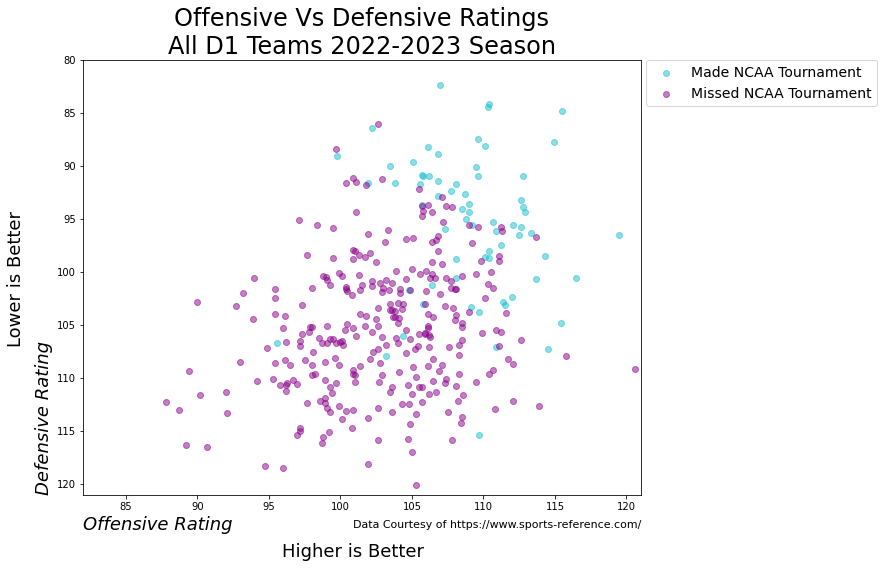

In [56]:
#Set your subplot
fig,ax = plt.subplots(figsize=(10, 8))
#The two colors for the legend in hex code
colors = ['#17becf', '#8b008b']
i = 0 #enumerate did not work correctly, I know this isn't ideal
'''
This plots each group one at a time
Groups are Made NCAA tournament and Missed NCAA Tournament
'''
for k, d in df_ncaa.groupby('Tournament'):
    ax.scatter(d['ORtg'], d['DRtg'], label=k, c=colors[i], alpha=0.5)
    i+=1

#setting the x and y axis ranges
ax.set_xlim([82, 121])
ax.set_ylim([82, 121])
plt.xticks([85, 90, 95, 100, 105, 110, 115, 120])
plt.yticks([80, 85, 90, 95, 100, 105, 110, 115, 120])
#Invert the y axis so the better defensive teams are on the top
ax.invert_yaxis()

#Setting all our titles and ranges
plt.title('Offensive Vs Defensive Ratings\nAll D1 Teams 2022-2023 Season', fontsize=24)
plt.xlabel('Offensive Rating', style='italic', loc='left', fontsize=18)
plt.ylabel('Defensive Rating', style='italic', loc='bottom', fontsize=18)
plt.annotate('Data Courtesy of https://www.sports-reference.com/', (0,0), (270,-25), fontsize=11, 
             xycoords='axes fraction', textcoords='offset points', va='top')
plt.legend(bbox_to_anchor=(1.01, 1),
                         loc='upper left', borderaxespad=0, fontsize=14)

fig.supxlabel('Higher is Better', fontsize=18)
fig.supylabel('Lower is Better', fontsize=18)

plt.savefig('basic_scatterplot.png',bbox_inches='tight')
plt.show()

This is your simple run-of-the-mill scatter plot. The colors indicate whether or not a basketball team made the coveted NCAA tournament. From the scatter plot, we can see that most of the teams that made the tournament have elite-level Defensive Ratings. Now if all the code puts you off I highly recommend using Seaborn instead of Matplotlib. Seaborn runs on top of Matplotlib but makes creating visuals simpler and the cost of some customization.

## Create file paths to locate logos

In [19]:
df_ncaa['path'] = 'logos\\' + df_ncaa['School_new'] + '.png'
df_ncaa

School   G   W   L   W-L%    SRS   SOS  Conf_W  Conf_L  \
0    Abilene Christian  30  13  17  0.433  -2.79  0.90     5.0    11.0   
1            Air Force  32  14  18  0.438   2.00  2.12     5.0    13.0   
2                Akron  33  22  11  0.667   4.19 -1.65    13.0     5.0   
3          Alabama A&M  33  15  18  0.455 -10.78 -7.71    10.0     8.0   
4        Alabama State  31   8  23  0.258 -16.33 -6.29     6.0    12.0   
..                 ...  ..  ..  ..    ...    ...   ...     ...     ...   
358     Creighton NCAA  37  24  13  0.649  17.83  9.80    14.0     6.0   
359             Toledo  35  27   8  0.771   5.76 -2.57    16.0     2.0   
360    Utah State NCAA  35  26   9  0.743  14.23  6.81    13.0     5.0   
361        Xavier NCAA  37  27  10  0.730  16.03  9.16    15.0     5.0   
362       Alabama NCAA  37  31   6  0.838  23.19  9.65    16.0     2.0   

     Home_W  ...    MOV  SOS_2   OSRS  DSRS  SRS_2  ORtg_2    DRtg   NRtg  \
0         9  ...   3.87   0.90   1.19 -3.98  -2.79  102.67  106.34  -3.67   
1        10  ...  -0.13   2.12  -2.88  4.88   2.00  105.60  102.93   2.68   
2        15  ...   7.70  -1.65   0.99  3.21   4.19  107.23  101.11   6.12   
3         9  ...  -1.30  -7.71  -6.15 -4.63 -10.78   93.65  108.46 -14.81   
4         5  ...  -9.32  -6.29 -11.11 -5.22 -16.33   88.63  111.29 -22.66   
..      ...  ...    ...    ...    ...   ...    ...     ...     ...    ...   
358      13  ...   8.03   9.80   9.54  8.29  17.83  116.51   90.96  25.56   
359      13  ...   8.51  -2.57  11.97 -6.21   5.76  117.19  109.20   7.99   
360      14  ...   8.29   6.81  10.31  3.92  14.23  115.77   95.79  19.98   
361      15  ...   6.86   9.16  13.90  2.13  16.03  117.67   95.59  22.08   
362      15  ...  13.54   9.65  16.81  6.38  23.19  116.59   84.21  32.38   

          School_new_2                         path  
0    abilene-christian  logos\abilene-christian.png  
1            air-force          logos\air-force.png  
2                akron              logos\akron.png  
3           alabama-am         logos\alabama-am.png  
4        alabama-state      logos\alabama-state.png  
..                 ...                          ...  
358          creighton          logos\creighton.png  
359             toledo             logos\toledo.png  
360         utah-state         logos\utah-state.png  
361             xavier             logos\xavier.png  
362            alabama            logos\alabama.png  

[363 rows x 47 columns]

## Check if any logos were missing

In [21]:
count_y = 0
count_n = 0
missing = []
for path in df_ncaa['path']:
    if not os.path.isfile(path):
        count_n += 1
        missing.append(path)
    if os.path.isfile(path):
        count_y += 1
print('exist: ', count_y)
print('does not exist: ', count_n)
print(missing)

exist:  363
does not exist:  0
[]


## Function to read in logo images

In [22]:
def getImage(path):
    
    return OffsetImage(plt.imread(path), zoom=0.015, alpha = 1)

# The Fun Scatterplot
You didn’t click to article to see a basic scatterplot, let’s get to the more detailed scatterplot with college logos so you can easily pick out where your favorite (and rival) teams are. Here is the scatterplot using college logos:

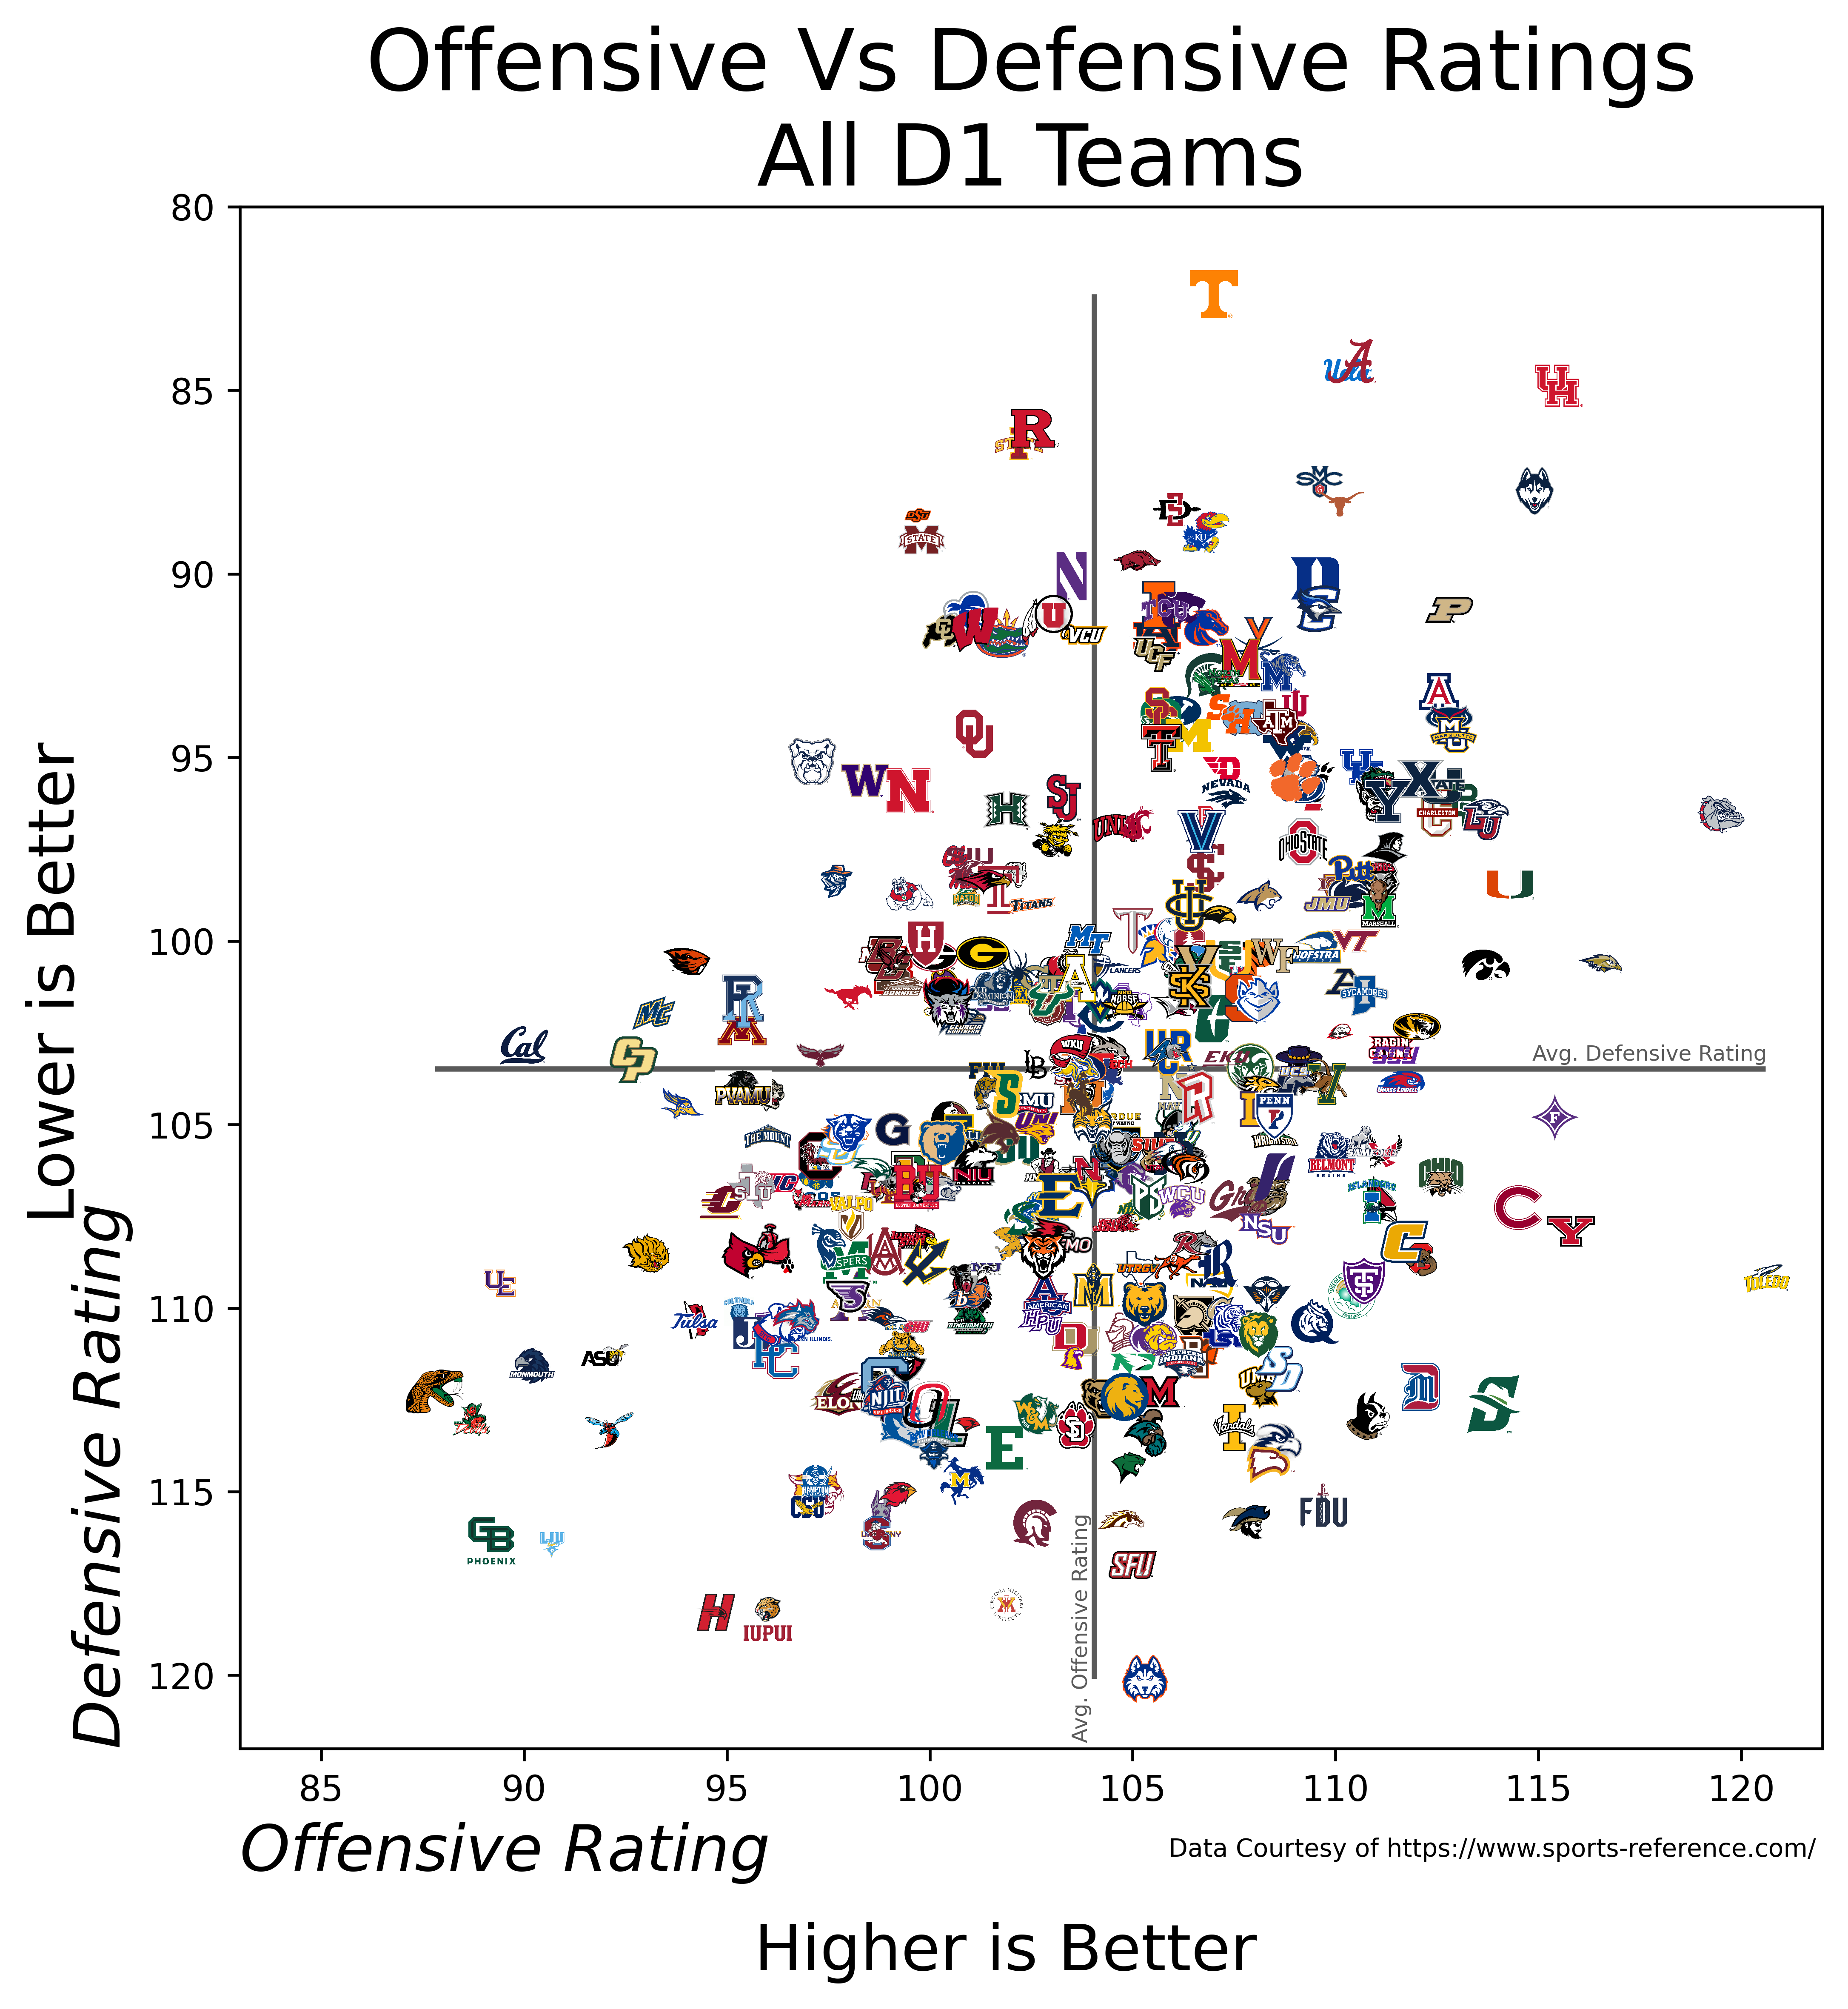

In [37]:
x_value = 'ORtg'
y_value = 'DRtg'
#High DPI so the logos are shown at a high quality and not blurry
fig, ax = plt.subplots(figsize=(8, 8), dpi=600)
ax.scatter(df_ncaa[x_value], df_ncaa[y_value], color='white')

'''
New Code to create logos as data points
We read in a image file path to annotate over the scatterplot points
'''
for index, row in df_ncaa.iterrows():

    ab = AnnotationBbox(getImage(row['path']), (row[x_value], row[y_value]), frameon=False)
    ax.add_artist(ab)

#Set line values and titles
plt.hlines(df_ncaa[y_value].mean(), df_ncaa[x_value].max(), df_ncaa[x_value].min(), color='#5A5A5A')
plt.vlines(df_ncaa[x_value].mean(), df_ncaa[y_value].max(), df_ncaa[y_value].min(), color='#5A5A5A')
ax.set_title('Offensive Vs Defensive Ratings\nAll D1 Teams', fontsize=24)
plt.xlabel('Offensive Rating', style='italic', loc='left', fontsize=18)
plt.ylabel('Defensive Rating', style='italic', loc='bottom', fontsize=18)

#Set title and Axis titles
fig.supxlabel('Higher is Better', fontsize=18)
fig.supylabel('Lower is Better', fontsize=18)
ax.set_xlim([83, 122])
ax.set_ylim([83, 122])
plt.xticks([85, 90, 95, 100, 105, 110, 115, 120])
plt.yticks([80, 85, 90, 95, 100, 105, 110, 115, 120])

#Invert the y axis so the better defensive teams are on the top
ax.invert_yaxis()

plt.annotate('Data Courtesy of https://www.sports-reference.com/', (0,0), (262,-25), fontsize=7, 
             xycoords='axes fraction', textcoords='offset points', va='top')
fig.text(.758,.462,'Avg. Defensive Rating', size=6, color='#5A5A5A')
fig.text(.532,.13,'Avg. Offensive Rating', size=6, color='#5A5A5A',rotation=90)
plt.savefig('logo_scatterplot.png',bbox_inches='tight')
plt.show()

The logos are courtesy of [SportsLogos.net](https://www.sportslogos.net/) a [self-described](https://www.sportslogos.net/faq/): “virtual museum dedicated to the past, present, and future of graphic design in the world of sports." The two grey lines indicate the averages of defensive and offensive ratings throughout all of D1 Basketball. This means that we can split the teams into 4 quadrants: Bad Offense and Bad Defense (bottom left quadrant), Good Offense and Bad Defense (bottom right quadrant), Bad Offense and Good Defense (top left quadrant), and Good Offense and Good Defense (top right quadrant). This graph is a little messy because there are 363 logos for all the D1 teams. To get some insight from this visual, I filtered to just the 68 teams that made the NCAA Tournament.

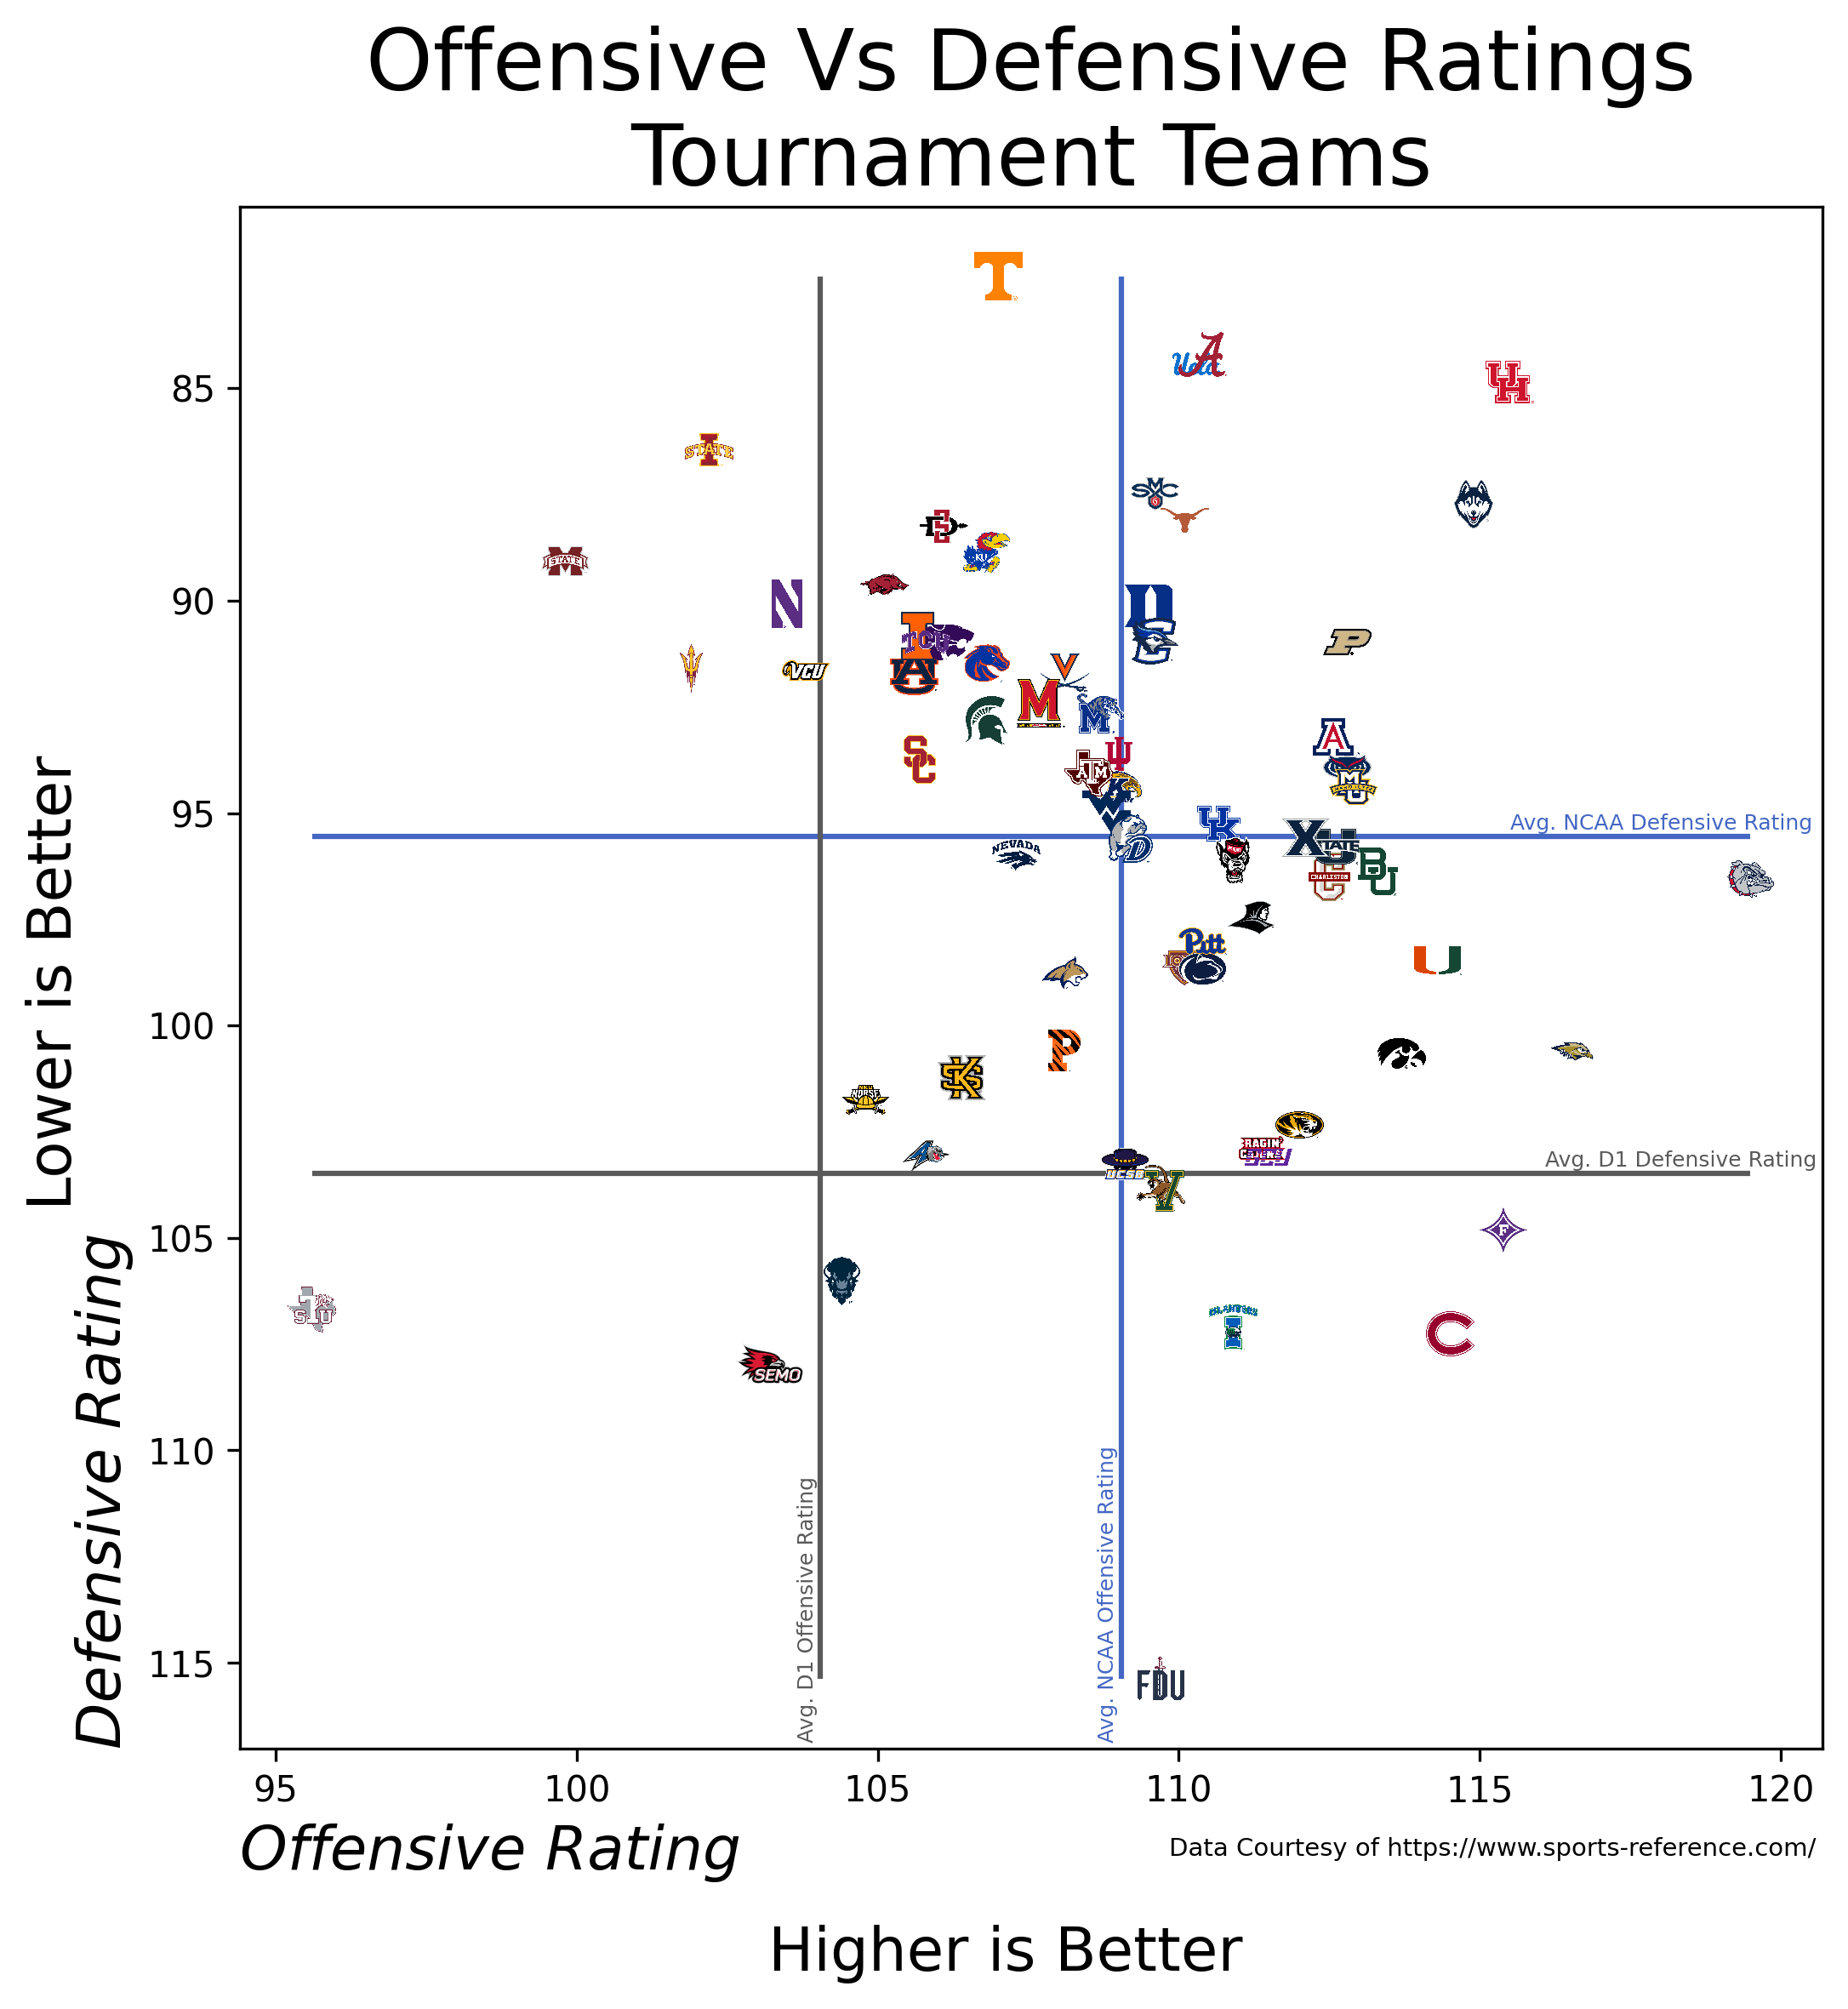

In [42]:
x_value = 'ORtg'
y_value = 'DRtg'
#New code top grab just the teams that made the ncaa tournament
df_tournament = df_ncaa.query('Tournament == "Made NCAA Tournament"')

fig, ax = plt.subplots(figsize=(8, 8), dpi=300)
ax.scatter(df_tournament[x_value], df_tournament[y_value], color='white')

for index, row in df_tournament.iterrows():

    ab = AnnotationBbox(getImage(row['path']), (row[x_value], row[y_value]), frameon=False)
    ax.add_artist(ab)

#Set line values and titles
plt.hlines(df_tournament[y_value].mean(), df_tournament[x_value].min(), df_tournament[x_value].max(), color='#4467C4')
plt.vlines(df_tournament[x_value].mean(), df_tournament[y_value].min(), df_tournament[y_value].max(), color='#4467C4')
plt.hlines(df_ncaa[y_value].mean(), df_tournament[x_value].min(), df_tournament[x_value].max(), color='#5A5A5A')
plt.vlines(df_ncaa[x_value].mean(), df_tournament[y_value].min(), df_tournament[y_value].max(), color='#5A5A5A')
ax.set_title('Offensive Vs Defensive Ratings\nTournament Teams', fontsize=24)
plt.xlabel('Offensive Rating', style='italic', loc='left', fontsize=17)
plt.ylabel('Defensive Rating', style='italic', loc='bottom', fontsize=17)

#Set titles
fig.supxlabel('Higher is Better', fontsize=17)
fig.supylabel('Lower is Better', fontsize=17)
plt.annotate('Data Courtesy of https://www.sports-reference.com/', (0,0), (262,-25), fontsize=7, 
             xycoords='axes fraction', textcoords='offset points', va='top')
#Invert the y axis so the better defensive teams are on the top
ax.invert_yaxis()
fig.text(.747,.575,'Avg. NCAA Defensive Rating', size=6, color='#4467C4')
fig.text(.545,.13,'Avg. NCAA Offensive Rating', size=6, color='#4467C4',rotation=90)
fig.text(.764,.41,'Avg. D1 Defensive Rating', size=6, color='#5A5A5A')
fig.text(.398,.13,'Avg. D1 Offensive Rating', size=6, color='#5A5A5A',rotation=90)
plt.savefig('ncaa_scatterplot.png',bbox_inches='tight')
plt.show()

In this visual, the grey lines still indicate the average Offensive and Defensive ratings for all of D1. We can see that most of the teams fall into the top right quadrant of good defense and good offense for all of NCAA. There are other interesting insights that can be extracted from this visual, for example, the teams that may not have deserved a bid based on their offensive ratings: Mississippi State, Iowa State, Northwestern, and Arizona State. I am also very happy to see my favorite team, the national champions UConn, is almost in a league of their own with only Houston near them in Offense and Defense ratings. I am sure you have your own insights and questions from this visual, if so, please leave a response. Or some data you would like to see on the X and Y axis.

## Extra Visual

Text(0.62, 0.13, 'Avg. NCAA Offensive Rating')

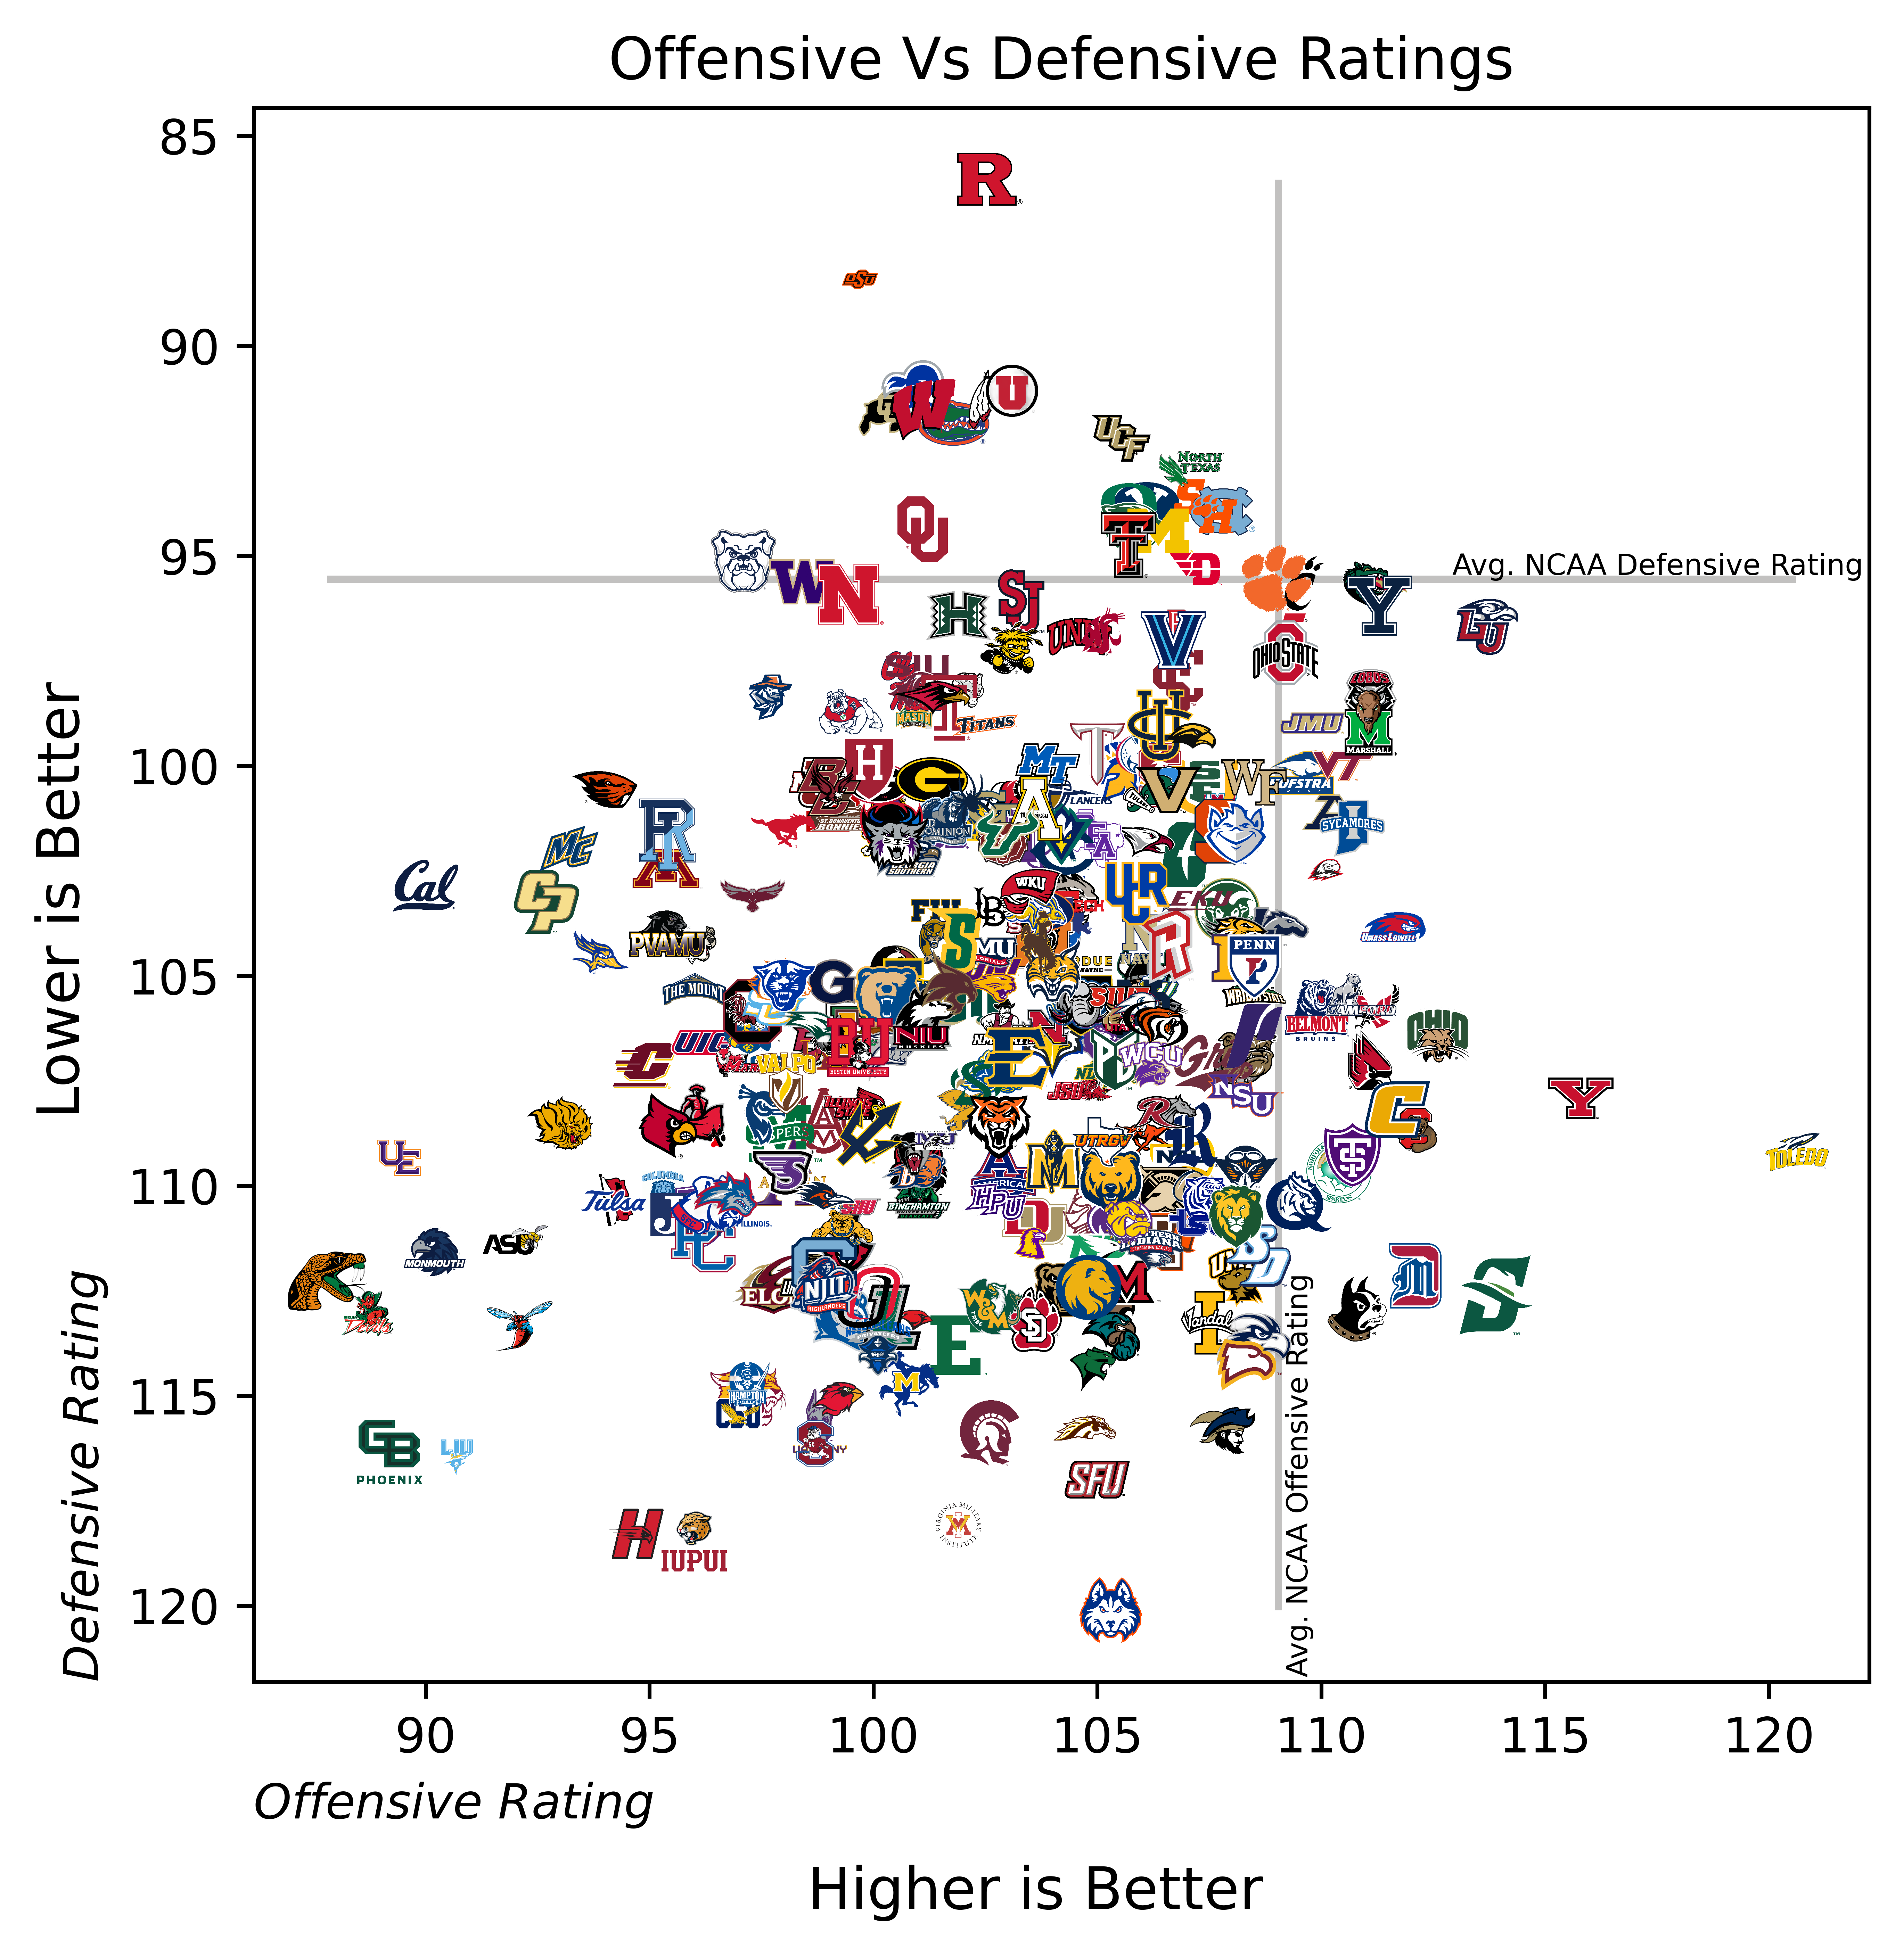

In [54]:
df_no = df_ncaa.query("Tournament == 'Missed NCAA Tournament'")

x_value = 'ORtg'
y_value = 'DRtg'

fig, ax = plt.subplots(figsize=(6, 6), dpi=1000)
ax.scatter(df_no[x_value], df_no[y_value], color='white')

for index, row in df_no.iterrows():
    ab = AnnotationBbox(getImage(row['path']), (row[x_value], row[y_value]), frameon=False)
    ax.add_artist(ab)

plt.hlines(df_tournament[y_value].mean(), df_no[x_value].min(), df_no[x_value].max(), color='#c2c1c0')
plt.vlines(df_tournament[x_value].mean(), df_no[y_value].min(), df_no[y_value].max(), color='#c2c1c0')
ax.set_title('Offensive Vs Defensive Ratings')
plt.xlabel('Offensive Rating', style='italic', loc='left')
plt.ylabel('Defensive Rating', style='italic', loc='bottom')

#Invert the y axis so the better defensive teams are on the top
ax.invert_yaxis()

fig.supxlabel('Higher is Better')
fig.supylabel('Lower is Better')
fig.text(.700,.656,'Avg. NCAA Defensive Rating', size=6, color='#000000')
fig.text(.620,.13,'Avg. NCAA Offensive Rating', size=6, color='#000000',rotation=90)

# The Extra Effort for Logos

If you're not interested in delving into the intricacies behind the creation of this chart, feel free to skip this last part. For those still with me, well let's dive into the process in which I got the logos. Originally, I was going to try and scrape the images from Sports Reference where I got the data from. However, I quickly encountered a hurdle – the logos were not only small and low quality but also featured white backgrounds. From there I noticed that the logos were courtesy of Sportslogo.net. I decided to get the logos from Sportslogo.net instead. Realizing that the downloaded logos wouldn't have standardized names, I decided to manually name them, as scraping wouldn't save time in this scenario. From there most of the logos were of high quality. Some of the logos had white backgrounds which makes it hard to view on a scatterplot because the white would cover up the logos behind it. I employed two methods for dealing with these white backgrounds. The first involved utilizing the remove algorithm in the rembg Python package, while the second utilized the Pillow library to eliminate all white pixels from the images. The dual approach was necessary, as for certain logos, removing all white pixels would inadvertently erase parts of the logo. Although the remove algorithm in rembg proved effective in many cases, there were instances where it didn't perform optimally.

## Remove Algorithm

In [94]:
for i in glob.glob(r'removed_background\*'):
    # Processing the image 
    input = Image.open(i)
    name = i.split('\\')[1]
    # Removing the background from the given Image 
    output = remove(input)
    output.save(fr'remove_background2\\{name}')

## Pillow remove white method

In [95]:
for i in glob.glob(r'removed_background\*'):
    img = Image.open(i)
    img = img.convert("RGBA")
    datas = img.getdata()
    newData = []
    for item in datas:
        if item[0] == 255 and item[1] == 255 and item[2] == 255:
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item)

    name = i.split('\\')[1]
    print(name)
    
    img.putdata(newData)
    img.save(f'remove_background2\\{name}', "PNG")
    print(i)

columbia.png
removed_background\columbia.png
niagara.png
removed_background\niagara.png
north-carolina-greensboro.png
removed_background\north-carolina-greensboro.png


## Couple Logos were too small so the needed to resized

In [166]:
im = Image.open('logos\southeast-missouri-state.png')
height, width = im.size
newsize = (2*height, 2*width)
im = im.resize(newsize)
im.save('logos\southeast-missouri-state2.png')
